Triangulation of detectors:

In [53]:
#DUNE: Sanford Underground Research Facility
# Viewport: 44.35025,-103.752727 – 44.352948,-103.750029
# Place ID: ChIJJaEfz62lMlMRuD0YJovmGE4

#HK: Kamioka Observatory
# Viewport: 36.433311,137.275302 – 36.436009,137.278
# Place ID: ChIJOaSYi9kC-F8RcQGK6LuVYQM

import numpy as np
from geographiclib.geodesic import Geodesic
import geopy.distance
from geopy import units
from math import pi

dune = (44.35025,-103.752727)
hk = (36.433311,137.275302)
juno = (22.11827, 112.51867)
# S = geopy.distance.geodesic(dune, hk).km
S = geopy.distance.geodesic(dune, juno).km
print(S)

Geodesic.WGS84.Inverse(44.35025,-103.752727, 36.433311,137.275302)

11775.119623142285


{'lat1': 44.35025,
 'lon1': -103.752727,
 'lat2': 36.433311,
 'lon2': 137.275302,
 'a12': 82.366108788391,
 's12': 9157339.780915093,
 'azi1': -45.237575290069394,
 'azi2': -140.84927930687184}

d= 6366.742596810936 rmin= 5513.760828194776
5513.760828194777 3183.371298405468
60.0


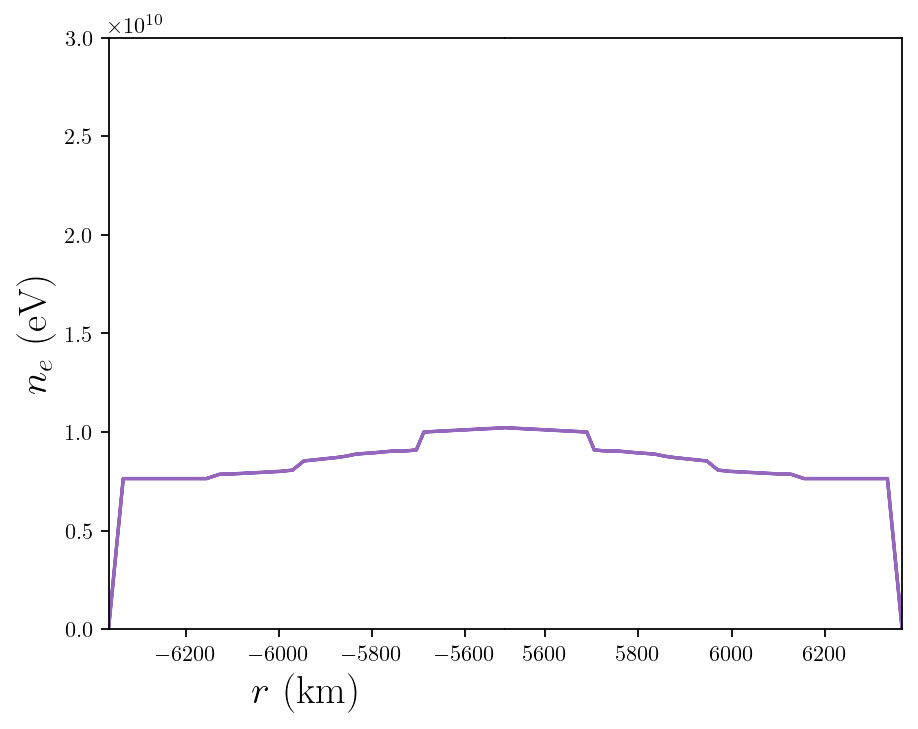

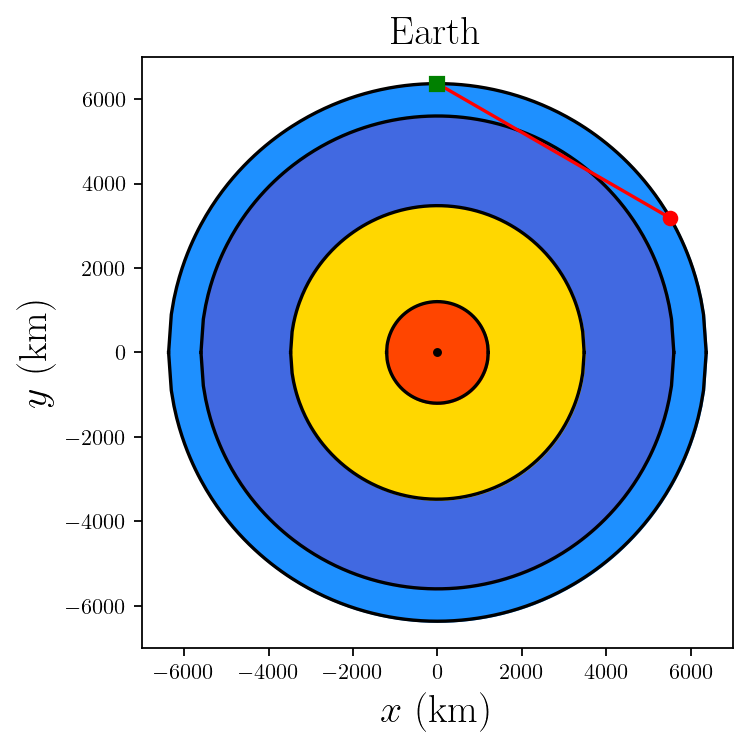

In [12]:
from numpy import tan, sqrt, pi, sin, arccos
import matplotlib.pyplot as plt
import numpy as np
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

data_ea = np.loadtxt('data/Earth_profile.txt', delimiter=',', skiprows=8)
r_data_earth = data_ea[:,0] #km
cm3_to_eV3 = (0.197e9*1e-15*100)**3
Na = 6.022e23
ne_earth = data_ea[:,1] * cm3_to_eV3 * Na #eV^3

#r in km, ne in eV^3
def ne_func_earth(r):
    r_data_earth_rev = -np.flip(r_data_earth)
    ne_earth_rev = np.flip(ne_earth)
    r_data_earth_complete = np.concatenate((r_data_earth_rev, r_data_earth))
    ne_earth_complete = np.concatenate((ne_earth_rev, ne_earth))
    ne_f = np.interp(r, r_data_earth_complete, ne_earth_complete)
    return ne_f

def l_earth(thetaz):
    alpha = 90 - thetaz
    alpha = alpha*pi/180
    x1 = 0
    y1 = max(r_data_earth)
    if thetaz >= 0 and thetaz <=90:
        x2 = 0
        y2 = max(r_data_earth)
    elif thetaz > 90 and thetaz <= 180:
        x2 = -2*max(r_data_earth)*tan(alpha)/(1+tan(alpha)**2)
        y2 = tan(alpha)*x2 + max(r_data_earth)
    else:
        print('Error: the function l_earth supports only angles between 0 and 180 degrees')
    d = sqrt((x2-x1)**2 + (y2-y1)**2)

    def line_x_to_r_profile():
        xa = np.linspace(0,x2,101)
        a = (y2-y1)/(x2-x1)
        b = y1
        ya = a*xa + b
        rnew = sqrt(xa**2 + ya**2)
        return rnew
    
    r_new = line_x_to_r_profile()
    return d,x1,x2,y1,y2,r_new

# thetaz = 132.1
thetaz = 120
d,x1,x2,y1,y2,r_new = l_earth(thetaz)

def linex_to_r_prof(xa):
    a = (y2-y1)/(x2-x1)
    b = y1
    ya = a*xa + b
    rnew = sqrt(xa**2 + ya**2)
    return rnew

r_new_rev = -np.flip(r_new)
r_new_complete = np.concatenate((r_new_rev, r_new))
print('d=', d, 'rmin=', min(r_new))

print(x2,y2)

print(d*(180-thetaz)/max(r_data_earth))

f, (ax, ax2) = plt.subplots(1, 2, sharex=False, sharey=True, dpi=160)
ax.plot(r_new_rev, ne_func_earth(r_new_rev),'tab:purple')
ax2.plot(r_new, ne_func_earth(r_new),'tab:purple')
ax.set_xlim(min(r_new_rev), max(r_new_rev))
ax2.set_xlim(min(r_new), max(r_new))
# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(labelleft=False, left=False)
plt.subplots_adjust(wspace=0)
ax.set_xlabel(r'                                $r$ (km)',fontsize=18)
ax.set_ylabel(r'$n_e$ (eV)',fontsize=18)
ax.set_ylim(0,3e10)
plt.show()

x = np.linspace(-max(r_data_earth),max(r_data_earth),201)
y = sqrt(-x**2 + max(r_data_earth)**2)
plt.figure(dpi=160)
plt.plot(x,y,color='k')
plt.plot(x,-y,color='k')
plt.fill_between(x,y,color='dodgerblue')
plt.fill_between(x,-y,color='dodgerblue')

r1 =5600
x = np.linspace(-r1,r1,201)
y = sqrt(-x**2 + r1**2)
plt.plot(x,y,color='k')
plt.plot(x,-y,color='k')
plt.fill_between(x,y,color='royalblue')
plt.fill_between(x,-y,color='royalblue')

r2 = 3476.3019435716797
x = np.linspace(-r2,r2,201)
y = sqrt(-x**2 + r2**2)
plt.fill_between(x,y,color='gold')
plt.fill_between(x,-y,color='gold')
plt.plot(x,y,color='k')
plt.plot(x,-y,color='k')

r3 = 1203
x = np.linspace(-r3,r3,201)
y = sqrt(-x**2 + r3**2)
plt.fill_between(x,y,color='orangered')
plt.fill_between(x,-y,color='orangered')
plt.plot(x,y,color='k')
plt.plot(x,-y,color='k')

plt.plot((x1,x2),(y1,y2),'-',color='red')
plt.plot(x1,y1,'gs')
plt.plot(x2,y2,'ro')

xa_new = 2475 
a = (y2-y1)/(x2-x1)
b = y1
r = sqrt(xa_new**2 + a**2*xa_new**2 + b**2 + 2*a*b*xa_new)
# plt.arrow(0,0, xa_new, r * sin(arccos(xa_new/r))-750, head_width=200, head_length=500, fc='blue', ec='blue')
plt.plot(0,0,'.',color='k')

plt.gca().set_aspect('equal')
plt.title('Earth',fontsize=18)
plt.xlabel(r'$x$ (km)',fontsize=18)
plt.ylabel(r'$y$ (km)',fontsize=18)
plt.show()

dIMB = 8535 #km
dK2 = 4363 #km

In [6]:
import numpy as np
from numpy import cos, sin, pi, array, abs, arcsin, arctan2

data_ea = np.loadtxt('data/Earth_profile.txt', delimiter=',', skiprows=8)
#Earth radius
r = max(data_ea[:,0]) #km

#equations for a line
# x = x1 + u*(x2-x1)
# y = y1 + u*(y2-y1)
# z = z1 + u*(z2-z1)
#for a sphere
# r**2 = x**2 + y**2 + z**2

#coordinates of detectors
dune = (44.35025,-103.752727)
hk = (36.433311,137.275302)
juno = (22.11827, 112.51867)

#convert from spherical to cartesian
def detector_cart(detector):
    if detector == 'dune':
        phi = dune[0]*pi/180
        lb = dune[1]*pi/180
    elif detector == 'hk':
        phi = hk[0]*pi/180
        lb = hk[1]*pi/180
    elif detector == 'juno':
        phi = juno[0]*pi/180
        lb = juno[1]*pi/180

    # phi, lb = lat,lon
    x1 = r*cos(phi)*cos(lb)
    y1 = r*cos(phi)*sin(lb)
    z1 = r*sin(phi)
    return x1,y1,z1

#convert from spherical to cartesian
def spherical_to_cart(lat, lon):
    phi, lb = lat*pi/180, lon*pi/180
    # phi, lb = lat,lon
    x1 = r*cos(phi)*cos(lb)
    y1 = r*cos(phi)*sin(lb)
    z1 = r*sin(phi)
    return x1,y1,z1

def cart_to_spherical(x,y,z):
    lat = arcsin(z/r)*180/pi
    lon = arctan2(y,x)*180/pi
    return lat,lon


#define the SN point in space given two points of intersection
def SN_coord(thetaz):
    phi_d = dune[0]*pi/180
    lb_d = dune[1]*pi/180

    #DUNE:
    x1 = r*cos(phi_d)*cos(lb_d)
    y1 = r*cos(phi_d)*sin(lb_d)
    z1 = r*sin(phi_d)

    # print(x1,y1,z1)
    
    # theta = 180
    # theta_rad = theta*pi/180

    d,_,_,_,_,_ = l_earth(thetaz)
    print('delta lat =',-dune[0]+d/r*(180-thetaz))

    #other side of Earth
    # if (180-thetaz) > arccos(r/d):
    if thetaz < 150:
        phi_d = phi_d + d/r*(180-thetaz)*pi/180
    else:
        phi_d = -phi_d + d/r*(180-thetaz)*pi/180
    
    # phi_d = d/r*thetaz*pi/180
    # phi_d = -phi_d + d/r*(180-thetaz)*pi/180
    x2 = r*cos(phi_d)*cos(pi+lb_d)
    y2 = r*cos(phi_d)*sin(pi+lb_d)
    # x2 = r*cos(-phi_d)*cos(pi + lb_d)
    # y2 = r*cos(-phi_d)*sin(pi + lb_d)
    z2 = r*sin(phi_d)

    # x2 = r*cos(-phi_d+pi)*cos(lb_d)
    # y2 = r*cos(-phi_d+pi)*sin(lb_d)
    # # x2 = r*cos(-phi_d)*cos(pi + lb_d)
    # # y2 = r*cos(-phi_d)*sin(pi + lb_d)
    # z2 = r*sin(-phi_d)

    P_dune_in = array([x2,y2,z2])
    xc = yc = zc = 0
    a = (x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2
    b = -2*((x2-x1)*(xc-x1) + (y2-y1)*(yc-y1) + (z2-z1)*(zc-z1))
    c = (xc-x1)**2 + (yc-y1)**2 + (zc-z1)**2 - r**2

    # print('b^2 - 4ac =', b**2 - 4*a*c)
    
    # if b**2 - 4*a*c > 0:
    #     print('It crosses Earth.')

    coeffs = [a,b,c]
    roots = np.roots(coeffs)

    kpc_to_km = 3.086e16
    u_kpc = 10
    u = u_kpc*kpc_to_km
    # u = 1.5
    x = x1 + u*(x2-x1)
    y = y1 + u*(y2-y1)
    z = z1 + u*(z2-z1)

    # P1 = array([x1,y1,z1])
    # P2 = array([x2,y2,z2])
    # P = P1 + u*(P2-P1)
    # u = 2
    # P = P1 + u*(P2-P1)
    # P_sn = P

    P_sn = array([x,y,z])
    return P_sn, P_dune_in


def coord_in(zenith, detector):
    if detector == 'hk':
        phi = hk[0]*pi/180
        lb = hk[1]*pi/180
    elif detector == 'juno':
        phi = juno[0]*pi/180
        lb = juno[1]*pi/180

    #Detector:
    x1 = r*cos(phi)*cos(lb)
    y1 = r*cos(phi)*sin(lb)
    z1 = r*sin(phi)

    P_sn , P_dune_in = SN_coord(zenith)
    print('pdunein=',P_dune_in)
    # print(cart_to_spherical(P_dune_in[0],P_dune_in[1],P_dune_in[2]))
    # P_sn = array([x2, y2, z2])*180/pi
    # P_sn = P_sn#*180/pi
    x2, y2, z2 = P_sn

    xc = yc = zc = 0
    a = (x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2
    b = -2*((x2-x1)*(xc-x1) + (y2-y1)*(yc-y1) + (z2-z1)*(zc-z1))
    c = (xc-x1)**2 + (yc-y1)**2 + (zc-z1)**2 - r**2
    
    if b**2 - 4*a*c > 0:
        print('It crosses Earth for {}.'.format(detector))

    coeffs = [a,b,c]
    u = np.roots(coeffs)
    # print('roots=',u)

    x = x1 + u*(x2-x1)
    y = y1 + u*(y2-y1)
    z = z1 + u*(z2-z1)

    P_in = array([x[0],y[0],z[0]])
    P_unphys_in = array([x[1],y[1],z[1]])

    lat = arcsin(z[0]/r)*180/pi
    lon = arctan2(y[0],x[0])*180/pi

    # if detector == 'juno':
    #     lat = arcsin(z[1]/r)*180/pi
    #     lon = arctan2(y[1],x[1])*180/pi

    P_lat_lon_in = array([lat, lon])

    return P_in, P_lat_lon_in, P_sn, P_dune_in #, P2_in

zenith = 120

P_hk_in, P_lat_lon_hk_in, P_sn, P_dune_in = coord_in(zenith,'hk')
P_juno_in, P_lat_lon_juno_in, _, _ = coord_in(zenith,'juno')

d,_,_,_,__,_ = l_earth(zenith)
xd,yd,zd = detector_cart('dune')
xid,yid,zid = P_dune_in
print('\nCoord. for dune in:',[-dune[0]+d/r*(180-zenith),dune[1]])
print('Coord. for dune:',dune)

xh,yh,zh = detector_cart('hk')
xih,yih,zih = P_hk_in
print('Coord. for hk in:',P_lat_lon_hk_in)
print('Coord. for hk:',hk)

xj,yj,zj = detector_cart('juno')
xij,yij,zij = P_juno_in
print('Coord. for juno in:',P_lat_lon_juno_in)
print('Coord. for juno:',juno)

delta lat = 15.649749999999997
pdunein= [ -375.13875408 -1532.74956995  6168.09216574]
It crosses Earth for hk.
delta lat = 15.649749999999997
pdunein= [ -375.13875408 -1532.74956995  6168.09216574]
It crosses Earth for juno.

Coord. for dune in: [15.649749999999997, -103.752727]
Coord. for dune: (44.35025, -103.752727)
Coord. for hk in: [  -2.32422283 -148.53739897]
Coord. for hk: (36.433311, 137.275302)
Coord. for juno in: [ -27.29474984 -141.83131953]
Coord. for juno: (22.11827, 112.51867)


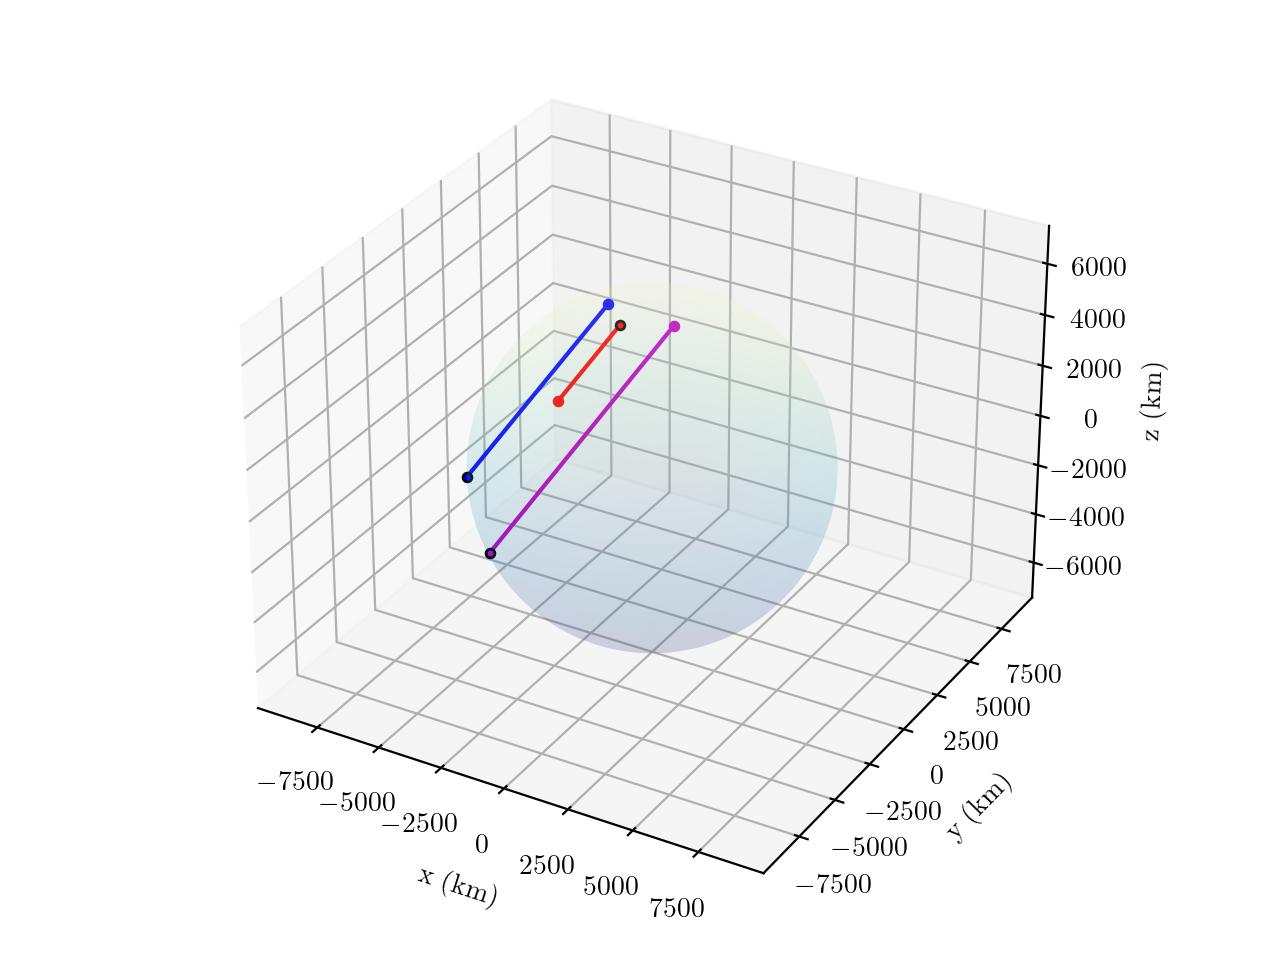

In [215]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
a = 200j
u, v = np.mgrid[0:2*pi:a, 0:pi:a]
x = r*cos(u)*sin(v)
y = r*sin(u)*sin(v)
z = r*cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r, alpha=0.1, zorder = -1)

ms = 10

ax.scatter(xd,yd,zd,'o',c='r',s=ms)
xid,yid,zid = P_dune_in
ax.scatter(xid,yid,zid,'o',c='r',s=ms,edgecolor='k')
ax.plot([xid,xd],[yid,yd],[zid,zd],'r')

ax.scatter(xh,yh,zh,'o',c='b',s=ms)
xih,yih,zih = P_hk_in
ax.scatter(xih,yih,zih,'o',c='b',s=ms,edgecolor='k')
ax.plot([xih,xh],[yih,yh],[zih,zh],'b')

ax.scatter(xj,yj,zj,'o',c='m',s=ms)
xij,yij,zij = P_juno_in
ax.scatter(xij,yij,zij,'o',c='m',s=ms,edgecolor='k')
ax.plot([xij,xj],[yij,yj],[zij,zj],'m')

# x,y,z=spherical_to_cart(-dune[0]+37.58770483143633 + 180, dune[1])
# ax.scatter(x,y,z,c='k')

# x,y,z=spherical_to_cart(-dune[0]+2*37 + 180, dune[1])
# ax.scatter(x,y,z,c='k')

# x,y,z=spherical_to_cart(-dune[0]+3*37 + 180, dune[1])
# ax.scatter(x,y,z,c='k')

xsn,ysn,zsn = P_sn
ax.scatter(xsn,ysn,zsn,'o',c='k',s=10)

rl = 1.5*r
ax.set_xlim(-rl,rl)
ax.set_ylim(-rl,rl)
ax.set_zlim(-rl,rl)

ax.set_xlabel(r'x (km)')
ax.set_ylabel(r'y (km)')
ax.set_zlabel(r'z (km)')
plt.tight_layout()
ax.set_aspect('equal')
plt.show()

In [44]:
import sqlite3 
connection = sqlite3.connect('regeneration/regeneration.db')
cursor = connection.cursor()

In [194]:
import sqlite3 

connection = sqlite3.connect('regeneration/regeneration.db')
cursor = connection.cursor()
cursor.execute("CREATE TABLE coordinates(detector TEXT, direction_dune TEXT, latitude_detec REAL, longitude_detec REAL, latitude_in REAL, longitude_in REAL, crossed_earth TEXT, zenith_dune REAL)")
# cursor.execute('DROP TABLE coordinates')

In [216]:
crossed_earth = 'no'
direction = 'oposite_dune'
detector= 'hk'
lat,lon = hk[0],hk[1]
lat_in,lon_in = P_lat_lon_hk_in
# lat_in,lon_in = None,None
cursor.execute("INSERT INTO coordinates values (?,?,?,?,?,?,?,?)",(detector,direction,lat,lon,lat_in,lon_in,crossed_earth,zenith))

crossed_earth = 'no'
direction = 'oposite_dune'
detector= 'juno'
lat,lon = juno[0],juno[1]
lat_in,lon_in = P_lat_lon_juno_in
# lat_in,lon_in = None,None
cursor.execute("INSERT INTO coordinates values (?,?,?,?,?,?,?,?)",(detector,direction,lat,lon,lat_in,lon_in,crossed_earth,zenith))
connection.commit()

In [217]:
data_coord = cursor.execute('select * from coordinates').fetchall()
print(data_coord)

[('hk', 'oposite_dune', 36.433311, 137.275302, 23.77067434168236, 126.52144919251218, 'yes', 180.0), ('juno', 'oposite_dune', 22.11827, 112.51867, 49.04629702483377, 132.9861794029262, 'no', 180.0), ('hk', 'oposite_dune', 36.433311, 137.275302, 42.545729512288126, 149.06702723327436, 'no', 160.0), ('juno', 'oposite_dune', 22.11827, 112.51867, 54.85957209077988, -175.96719088770078, 'no', 160.0), ('hk', 'oposite_dune', 36.433311, 137.275302, -3.2349105201609873, -148.58131696599537, 'no', 140.0), ('juno', 'oposite_dune', 22.11827, 112.51867, -28.3022398766622, -142.25063288078275, 'no', 140.0), ('hk', 'oposite_dune', 36.433311, 137.275302, -2.324222831611367, -148.53739897225057, 'no', 120.0), ('juno', 'oposite_dune', 22.11827, 112.51867, -27.294749836259694, -141.83131952655978, 'no', 120.0)]


In [203]:
cursor.execute('delete from coordinates')
connection.commit()

In [192]:
cursor.execute('drop table coordinates')
connection.commit()

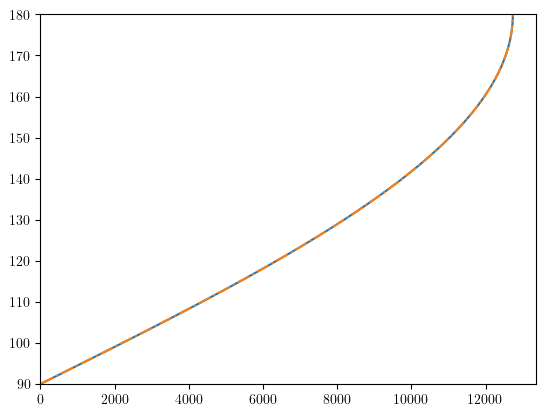

In [21]:
from scipy.interpolate import interp1d

tz_list = np.linspace(90.1,180,201)
d_list = []

for tz in tz_list:
    d,_,_,_,_,_ = l_earth(tz)
    d_list.append(d)

thetaz_func = interp1d(d_list,tz_list)
d2_list = np.linspace(min(d_list),2*max(r_data_earth),501)

plt.plot(d_list, tz_list)
plt.plot(d2_list, thetaz_func(d2_list),'-.')

plt.ylim(90,180)
plt.xlim(0,2.1*max(r_data_earth))
plt.show()

In [22]:
cursor.execute("DROP TABLE IF EXISTS zenith_all_detectors")
cursor.execute("""CREATE TABLE zenith_all_detectors(detector TEXT,
                                                    zenith_dune REAL,
                                                    zenith_detector REAL,
                                                    crossed_earth TEXT
)
""")

In [51]:
from math import pi
import numpy as np
from numpy import cos, sin
from scipy.interpolate import interp1d

tz_list = np.linspace(90.1,180,201)
d_list = []

for tz in tz_list:
    d,_,_,_,_,_ = l_earth(tz)
    d_list.append(d)

thetaz_func = interp1d(d_list,tz_list)

data_ea = np.loadtxt('data/Earth_profile.txt', delimiter=',', skiprows=8)
#Earth radius
r = max(data_ea[:,0]) #km

data_coord_hk = cursor.execute('SELECT crossed_earth,zenith_dune,latitude_in,longitude_in,zenith_dune FROM coordinates WHERE detector = ?',('hk',)).fetchall()
# print(data_coord_hk)

#coordinates of detectors
dune = (44.35025,-103.752727)
hk = (36.433311,137.275302)
juno = (22.11827, 112.51867)

#convert from spherical to cartesian
def spherical_to_cart(lat, lon):
    phi, lb = lat*pi/180, lon*pi/180
    # phi, lb = lat,lon
    x1 = r*cos(phi)*cos(lb)
    y1 = r*cos(phi)*sin(lb)
    z1 = r*sin(phi)
    return x1,y1,z1

tzh = []
for i in range(len(data_coord_hk)):
    coord = data_coord_hk[i]
    lat_in, lon_in = coord[2:4]
    zenith = coord[1]
    xh,yh,zh = spherical_to_cart(hk[0],hk[1])
    x,y,z = spherical_to_cart(lat_in,lon_in)
    d = np.sqrt((x - xh)**2 + (y - yh)**2 + (z - zh)**2)
    print(coord[0], zenith, d, thetaz_func(d))
    tvalue = thetaz_func(d)
    tzh.append(float(tvalue))
    # cursor.execute("INSERT INTO zenith_all_detectors VALUES (?,?,?,?)",('hk',zenith, float(tvalue), coord[0]))

print('')

data_coord_juno = cursor.execute('SELECT crossed_earth,zenith_dune,latitude_in,longitude_in,zenith_dune FROM coordinates WHERE detector = ?',('juno',)).fetchall()
tzj = []

for i in range(len(data_coord_juno)):
    coord = data_coord_juno[i]
    lat_in, lon_in = coord[2:4]
    zenith = coord[1]
    xh,yh,zh = spherical_to_cart(juno[0],juno[1])
    x,y,z = spherical_to_cart(lat_in,lon_in)
    d = np.sqrt((x - xh)**2 + (y - yh)**2 + (z - zh)**2)
    print(coord[0], zenith, d, thetaz_func(d))
    tvalue = thetaz_func(d)
    tzj.append(float(tvalue))
    # cursor.execute("INSERT INTO zenith_all_detectors VALUES (?,?,?,?)",('juno',zenith, float(tvalue), coord[0]))

print(tzh)
print(tzj)

# connection.commit()

yes 180.0 1737.8579098082996 97.84421607943858
no 160.0 1214.4897123887358 95.47306275942896
no 140.0 8123.702159412863 129.64136416059688
no 120.0 8078.644535901406 129.37887605122702

no 180.0 3449.304688991553 105.7170051252261
no 160.0 6511.74012154846 120.75643738758598
no 140.0 10626.154932730517 146.56494382389732
no 120.0 10633.578314145594 146.62548196139585
[97.84421607943858, 95.47306275942896, 129.64136416059688, 129.37887605122702]
[105.7170051252261, 120.75643738758598, 146.56494382389732, 146.62548196139585]


In [52]:
# cursor.execute("DELETE FROM zenith_all_detectors")
print(cursor.execute("SELECT * FROM zenith_all_detectors").fetchall())
# connection.commit()
connection.close()

[('hk', 180.0, 97.84421607943858, 'yes'), ('hk', 160.0, 95.47306275942896, 'no'), ('hk', 140.0, 129.64136416059688, 'no'), ('hk', 120.0, 129.37887605122702, 'no'), ('juno', 180.0, 105.7170051252261, 'no'), ('juno', 160.0, 120.75643738758598, 'no'), ('juno', 140.0, 146.56494382389732, 'no'), ('juno', 120.0, 146.62548196139585, 'no')]
